In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/CC GENERAL.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Link
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data

# EDA

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

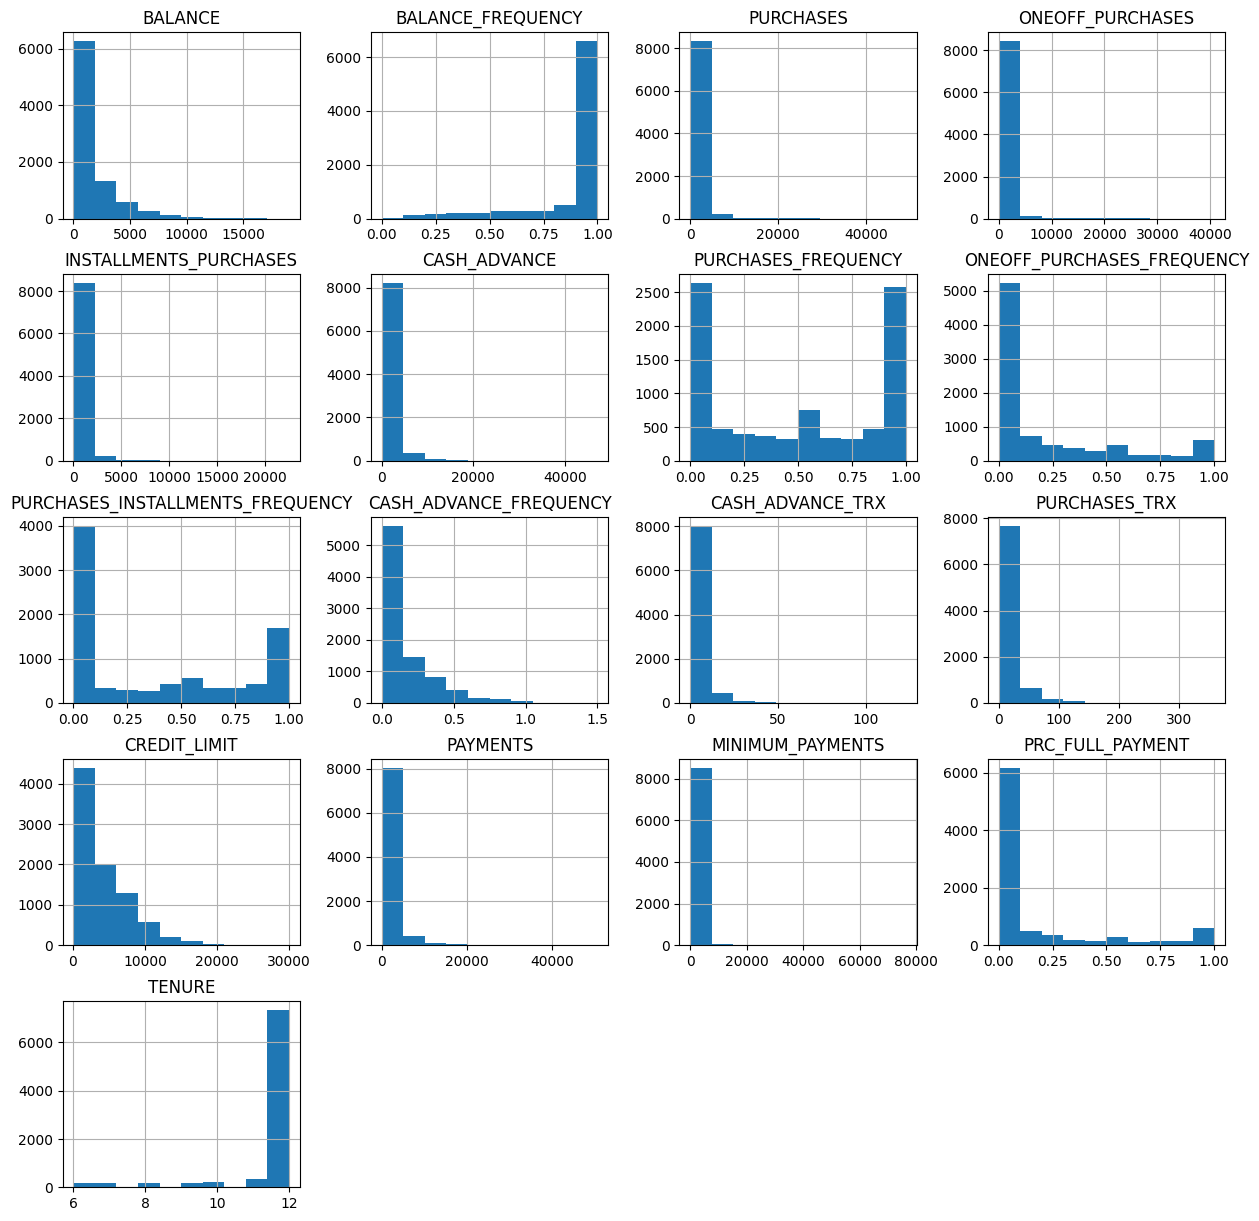

In [ ]:
df.hist(figsize=(15,15))

## Most of the columns appear to be skewed, so using **RobustScaler** may be a better choice since it is less sensitive to outliers. However, I will also experiment with **MinMaxScaler** and **StandardScaler** to compare their impact on model performance.


# PreProcessing

In [ ]:
df.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
    StandardScaler,
    MinMaxScaler
)

RobustNumericalPipeline = make_pipeline(RobustScaler())
StandardNumericalPipeline = make_pipeline(StandardScaler())
MinMaxNumericalPipeline = make_pipeline(MinMaxScaler())

NumColumns = df.select_dtypes(include=[np.float64,np.int64]).columns

RobustColumnTrans = ColumnTransformer([('Numerical',RobustNumericalPipeline,NumColumns)
                                  ])

StandardColumnTrans = ColumnTransformer([('Numerical',StandardNumericalPipeline,NumColumns)
                                  ])

MinMaxColumnTrans = ColumnTransformer([('Numerical',MinMaxNumericalPipeline,NumColumns)
                                  ])

RobustX = RobustColumnTrans.fit_transform(df)

StandardX = StandardColumnTrans.fit_transform(df)

MinMaxX = MinMaxColumnTrans.fit_transform(df)

# Clustring

## Kmeans

In [ ]:
from sklearn.cluster import KMeans

RobustInertia = []
StandardInertia = []
MinMaxInertia = []
DefaultInertia = []

for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(RobustX)
  RobustInertia.append(km.inertia_)

  km.fit(StandardX)
  StandardInertia.append(km.inertia_)

  km.fit(MinMaxX)
  MinMaxInertia.append(km.inertia_)

  km.fit(df)
  DefaultInertia.append(km.inertia_)


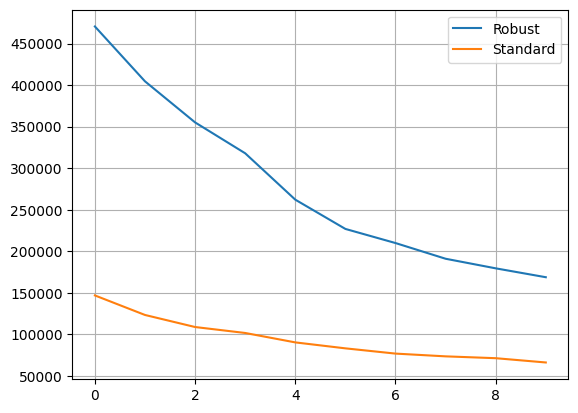

In [ ]:
plt.plot(np.arange(len(RobustInertia)), RobustInertia, label='Robust')
plt.plot(np.arange(len(StandardInertia)), StandardInertia, label='Standard')


plt.legend()
plt.grid(True)
plt.show()


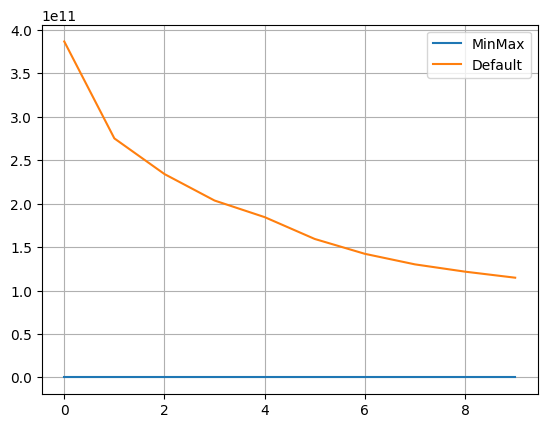

In [ ]:
plt.plot(np.arange(len(MinMaxInertia)), MinMaxInertia, label='MinMax')
plt.plot(np.arange(len(DefaultInertia)), DefaultInertia, label='Default')

plt.legend()
plt.grid(True)
plt.show()

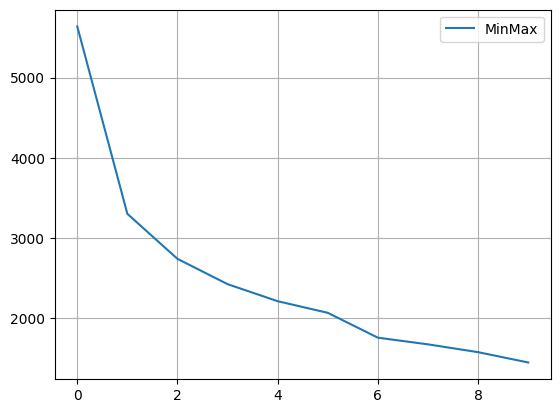

In [ ]:
plt.plot(np.arange(len(MinMaxInertia)), MinMaxInertia, label='MinMax')

plt.legend()
plt.grid(True)
plt.show()

### the MinMax Scaler performed better

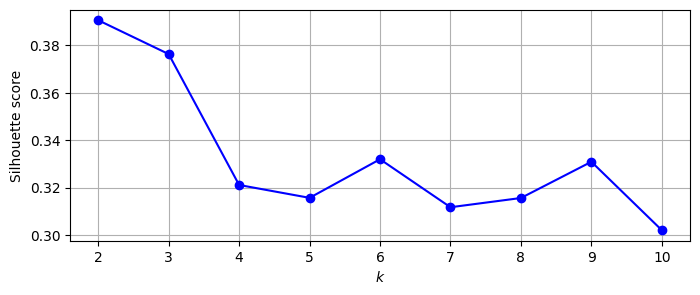

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2,11):
  km = KMeans(n_clusters=i)
  y_pred = km.fit(MinMaxX).labels_
  silhouette_scores.append(silhouette_score(MinMaxX, y_pred))


plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()

plt.show()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

DB = DBSCAN()

RobustDB = DB.fit(RobustX).labels_

MinMaxDB = DB.fit(MinMaxX).labels_

StandardDB = DB.fit(StandardX).labels_

DefaultDB = DB.fit(df).labels_

In [ ]:
np.unique(RobustDB)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
np.unique(MinMaxDB)

array([-1,  0])

In [ ]:
np.unique(StandardDB)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35])

In [ ]:
np.unique(DefaultDB)

array([-1])

### it seems that DBSCAN isn't performing good on this data

## hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

RobustSilhouetteScores = []
StandardSilhouetteScores = []
MinMaxSilhouetteScores = []
DefaultSilhouetteScores = []

for i in range(2,11):
  AG = AgglomerativeClustering(n_clusters=i)
  AG.fit(RobustX)
  RobustSilhouetteScores.append(silhouette_score(RobustX, AG.labels_))

  AG.fit(StandardX)
  StandardSilhouetteScores.append(silhouette_score(StandardX, AG.labels_))

  AG.fit(MinMaxX)
  MinMaxSilhouetteScores.append(silhouette_score(MinMaxX, AG.labels_))

  AG.fit(df)
  DefaultSilhouetteScores.append(silhouette_score(df, AG.labels_))

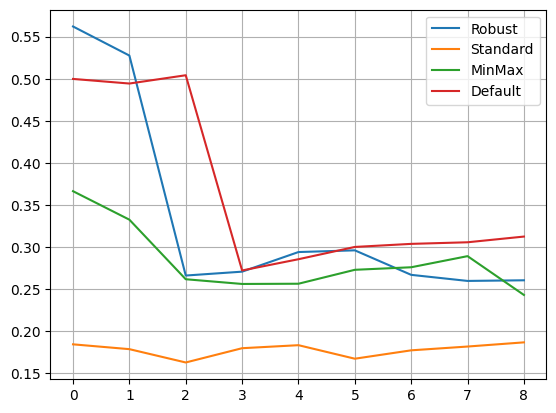

In [ ]:
plt.plot(np.arange(len(RobustSilhouetteScores)), RobustSilhouetteScores, label='Robust')
plt.plot(np.arange(len(StandardSilhouetteScores)), StandardSilhouetteScores, label='Standard')
plt.plot(np.arange(len(MinMaxSilhouetteScores)), MinMaxSilhouetteScores, label='MinMax')
plt.plot(np.arange(len(DefaultSilhouetteScores)), DefaultSilhouetteScores, label='Default')

plt.legend()
plt.grid(True)
plt.show()

# Visualizing how the data is divided into **2 clusters** by KMeans across the columns.


In [ ]:
km = KMeans(n_clusters = 2)
df['Label'] = km.fit(MinMaxX).labels_

In [ ]:
df['Label'].value_counts()

,count
Label,
0,4689
1,3947


In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Label'],
      dtype='object')

In [ ]:
zerodf = df[df['Label']==0]

In [ ]:
onedf = df[~(df['Label']==0)]

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>,
        <Axes: title={'center': 'Label'}>, <Axes: >, <Axes: >]],
      dtype=obje

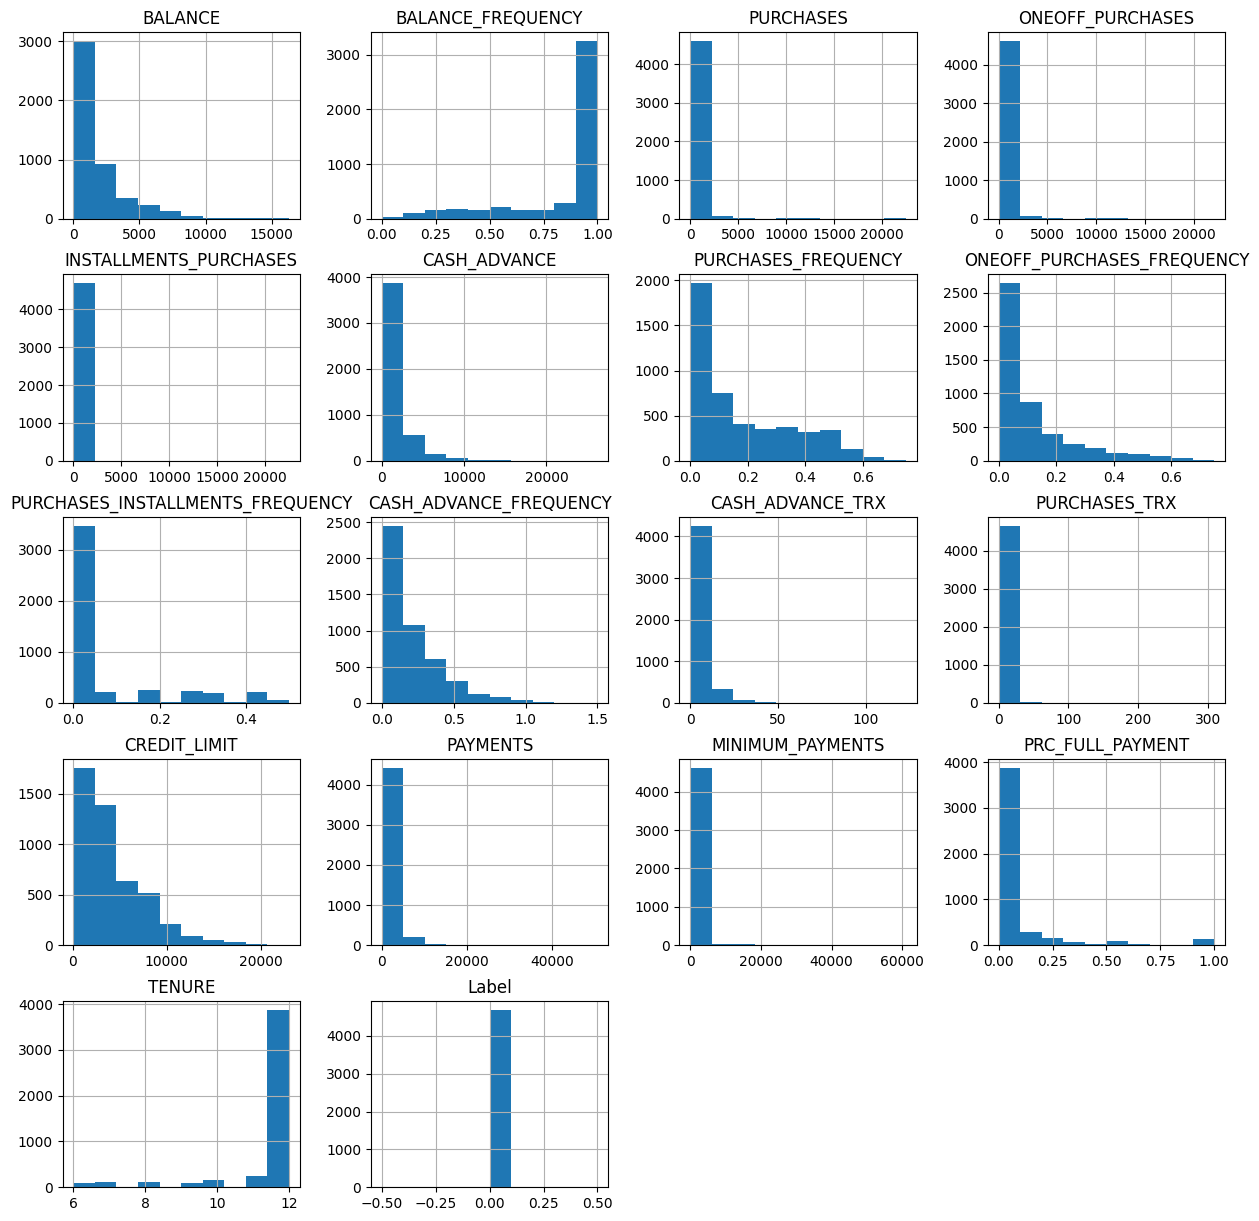

In [ ]:
zerodf.hist(figsize=(15,15))

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>,
        <Axes: title={'center': 'Label'}>, <Axes: >, <Axes: >]],
      dtype=obje

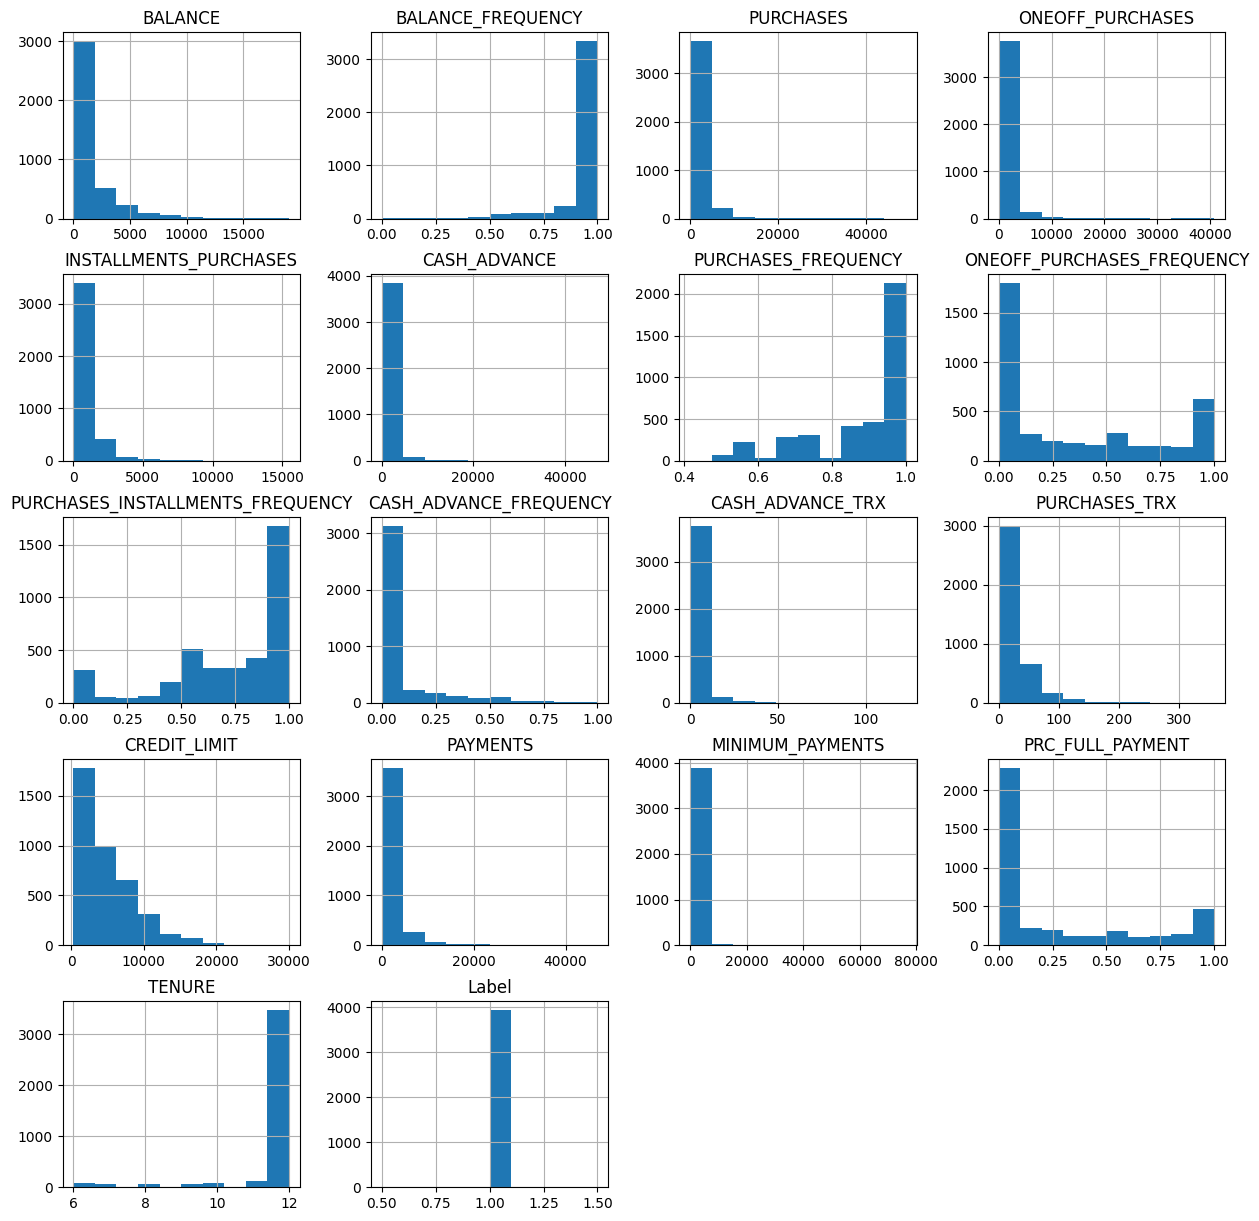

In [ ]:
onedf.hist(figsize=(15,15))

<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='Count'>

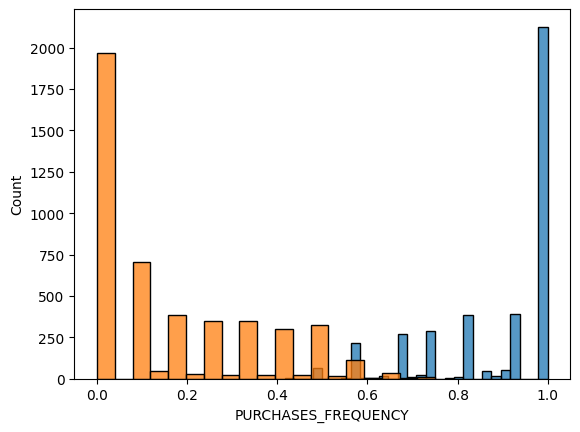

In [ ]:
sns.histplot(data=onedf,x='PURCHASES_FREQUENCY')
sns.histplot(data=zerodf,x='PURCHASES_FREQUENCY')

<Axes: xlabel='ONEOFF_PURCHASES_FREQUENCY', ylabel='Count'>

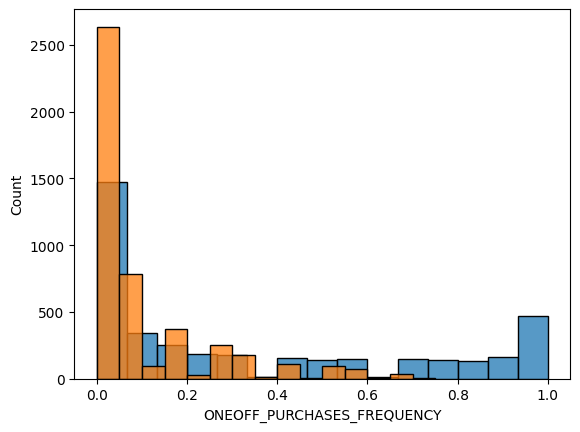

In [ ]:
sns.histplot(data=onedf,x='ONEOFF_PURCHASES_FREQUENCY',bins=15)
sns.histplot(data=zerodf,x='ONEOFF_PURCHASES_FREQUENCY',bins=15)

<Axes: xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='Count'>

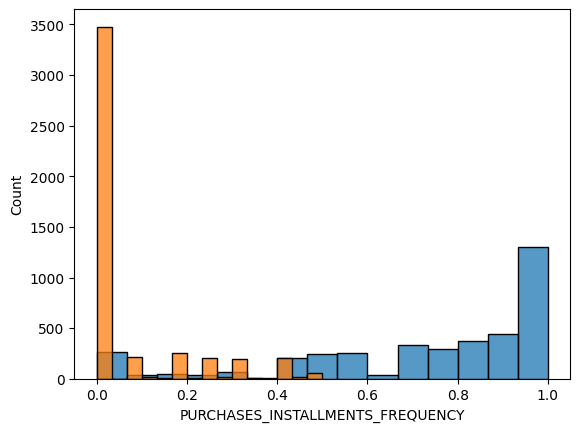

In [ ]:
sns.histplot(data=onedf,x='PURCHASES_INSTALLMENTS_FREQUENCY',bins=15)
sns.histplot(data=zerodf,x='PURCHASES_INSTALLMENTS_FREQUENCY',bins=15)

The two clusters show clear differences in purchasing behavior:

- **Cluster 1**:
  - Makes fewer purchases overall.
  - Purchases are smaller and less frequent.
  - Rarely uses installment payments (**low PURCHASES_INSTALLMENTS_FREQUENCY**).

- **Cluster 0**:
  - Makes more purchases overall.
  - Purchases are larger and more frequent.
  - Frequently uses installment payments (**high PURCHASES_INSTALLMENTS_FREQUENCY**).

In other words, cluster 1 represents **less active customers**, while cluster 0 represents **more active customers**.


# Visualizing how the data is divided into **3 clusters** by KMeans across the columns.


In [ ]:
km = KMeans(n_clusters = 3)
df['Label'] = km.fit(MinMaxX).labels_

In [ ]:
df['Label'].value_counts()

,count
Label,
0,4504
1,2717
2,1415


In [ ]:
SegmentOnedf = df[df['Label']==0]
SegmentTwodf = df[df['Label']==1]
SegmentThreedf = df[df['Label']==2]

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>,
        <Axes: title={'center': 'Label'}>, <Axes: >, <Axes: >]],
      dtype=obje

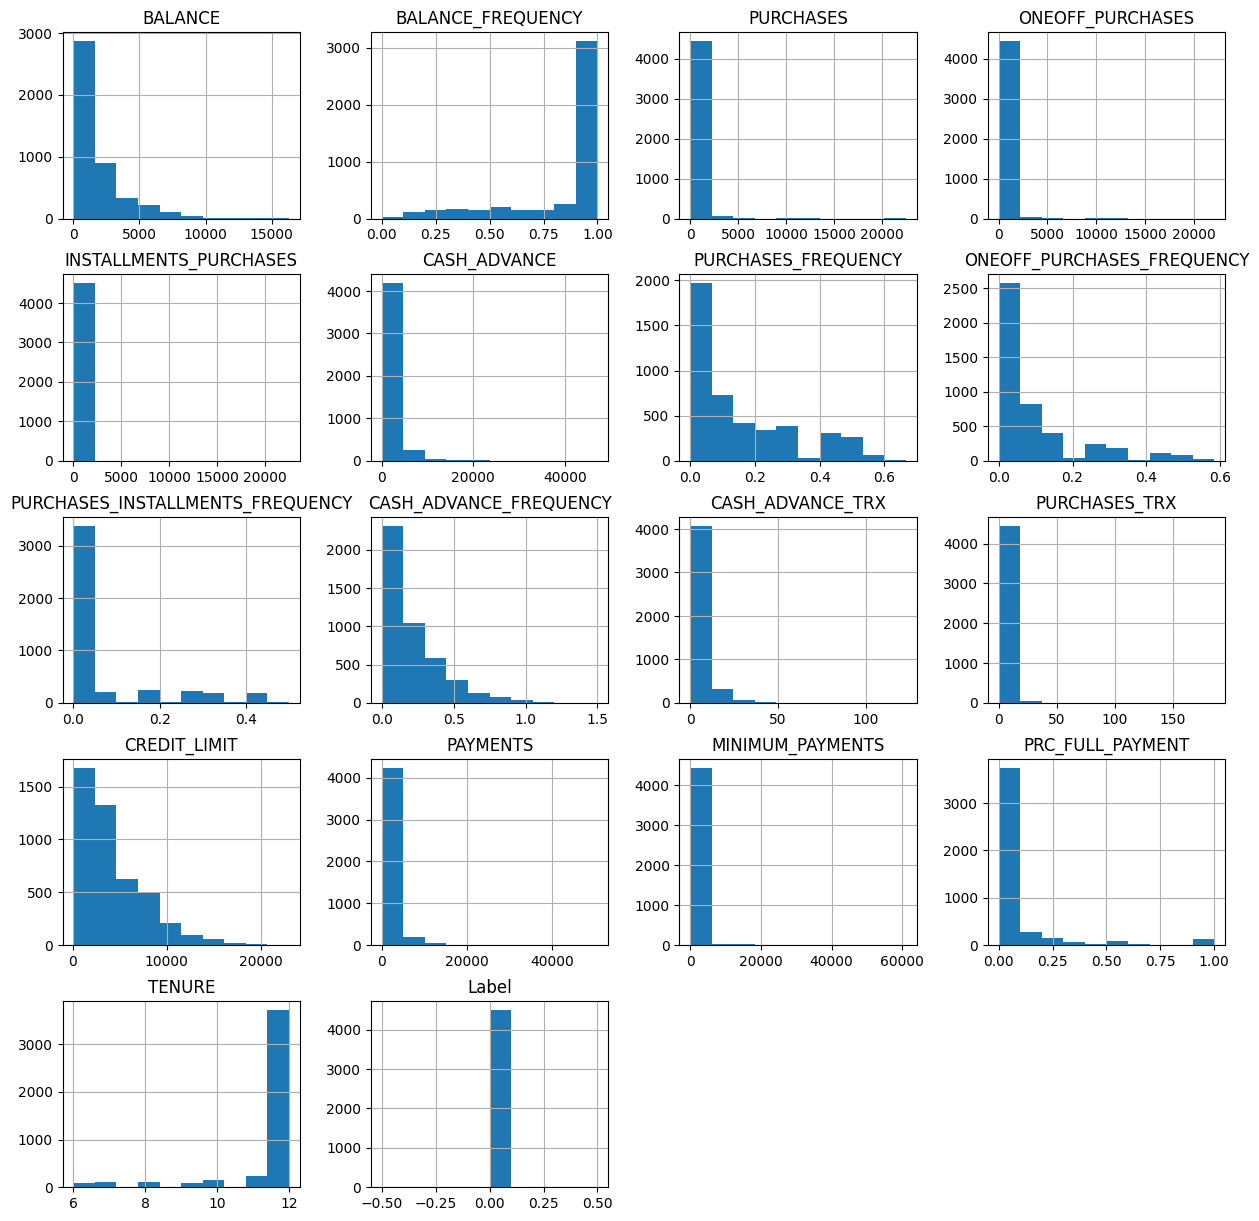

In [ ]:
SegmentOnedf.hist(figsize=(15,15))

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>,
        <Axes: title={'center': 'Label'}>, <Axes: >, <Axes: >]],
      dtype=obje

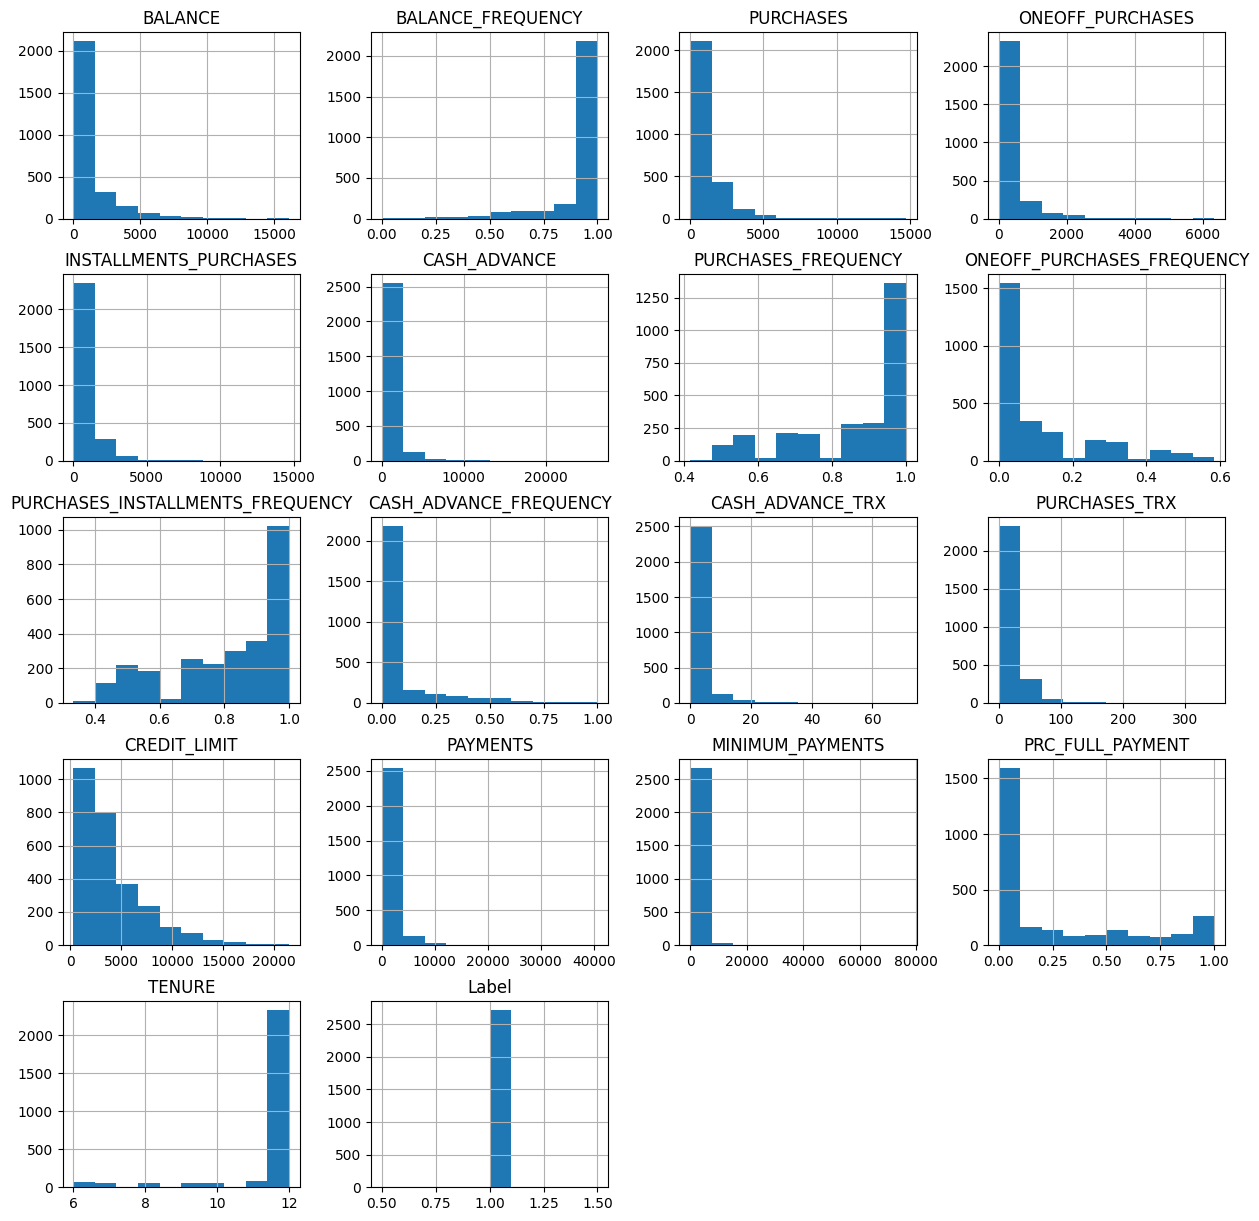

In [ ]:
SegmentTwodf.hist(figsize=(15,15))

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>,
        <Axes: title={'center': 'Label'}>, <Axes: >, <Axes: >]],
      dtype=obje

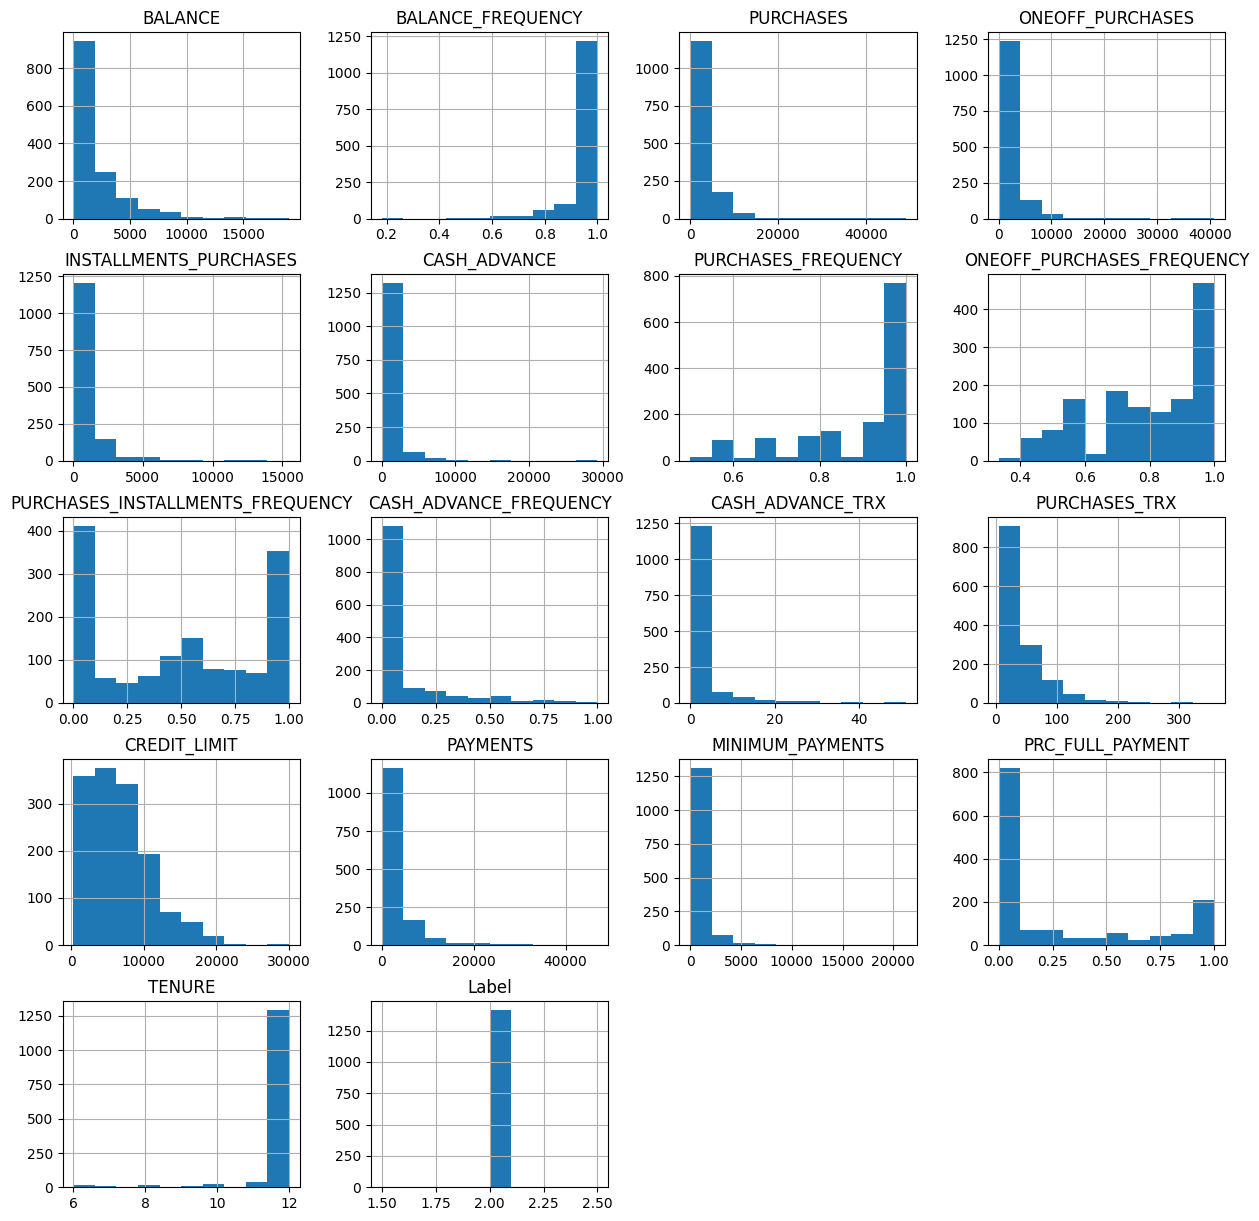

In [ ]:
SegmentThreedf.hist(figsize=(15,15))

<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='Count'>

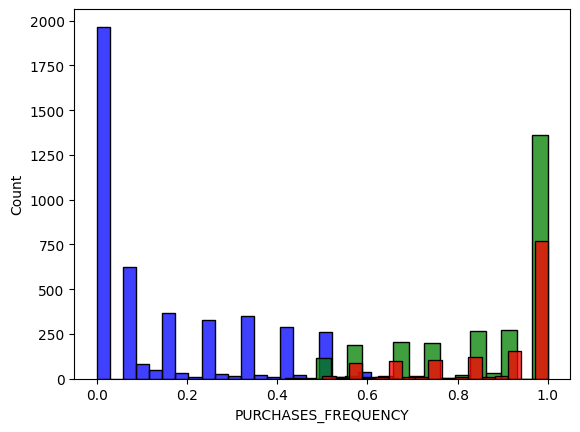

In [ ]:
sns.histplot(data=SegmentOnedf,x='PURCHASES_FREQUENCY',color = 'blue')
sns.histplot(data=SegmentTwodf,x='PURCHASES_FREQUENCY',color = 'green')
sns.histplot(data=SegmentThreedf,x='PURCHASES_FREQUENCY',color='red')

<Axes: xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='Count'>

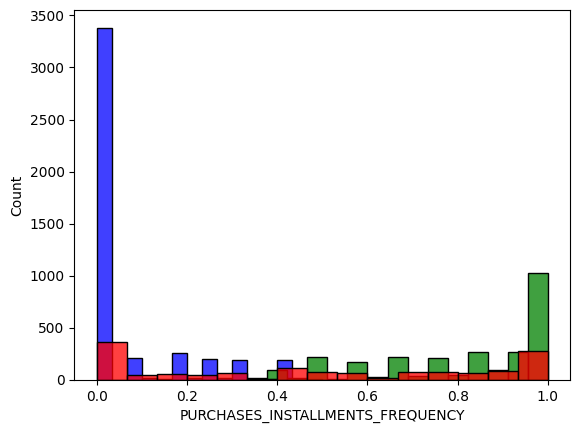

In [ ]:
sns.histplot(data=SegmentOnedf,x='PURCHASES_INSTALLMENTS_FREQUENCY',bins=15,color = 'blue')
sns.histplot(data=SegmentTwodf,x='PURCHASES_INSTALLMENTS_FREQUENCY',bins=15,color = 'green')
sns.histplot(data=SegmentThreedf,x='PURCHASES_INSTALLMENTS_FREQUENCY',bins=15,color='red')

<Axes: xlabel='ONEOFF_PURCHASES_FREQUENCY', ylabel='Count'>

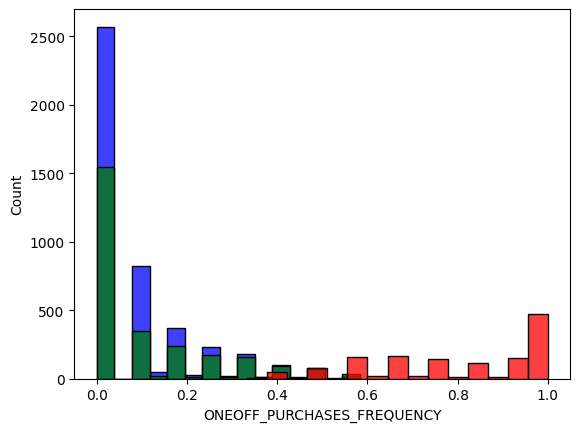

In [ ]:
sns.histplot(data=SegmentOnedf,x='ONEOFF_PURCHASES_FREQUENCY',bins=15,color = 'blue')
sns.histplot(data=SegmentTwodf,x='ONEOFF_PURCHASES_FREQUENCY',bins=15,color = 'green')
sns.histplot(data=SegmentThreedf,x='ONEOFF_PURCHASES_FREQUENCY',bins=15,color='red')

The three segments show distinct purchasing behaviors:

- **Segment 1**:
  - Has the lowest overall purchase frequency compared to other segments.
  - Purchases in installments are minimal (**low PURCHASES_INSTALLMENTS_FREQUENCY**).
  - On/off purchase frequency is low (**low PURCHASES_ONLINE_FREQUENCY**).

- **Segment 2**:
  - Purchase frequency is higher than segment 1 and similar to segment 3.
  - Shows the highest use of installment payments (**high PURCHASES_INSTALLMENTS_FREQUENCY**).
  - On/off purchase frequency is low (**low PURCHASES_ONLINE_FREQUENCY**), similar to segment 1.

- **Segment 3**:
  - Purchase frequency is similar to segment 2.
  - Includes all values for installment payments (**wide range in PURCHASES_INSTALLMENTS_FREQUENCY**).
  - On/off purchase frequency is the highest (**high PURCHASES_ONLINE_FREQUENCY**).

In summary, **segment 1 represents less active customers**, **segment 2 represents highly installment-focused customers**, and **segment 3 represents customers with diverse purchasing patterns and high online activity**.
